In [49]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.cluster import vq, hierarchy

In [28]:
np.set_printoptions(threshold=10)

* **`scipy.cluser.vq`**: vector quantization (K-means)
* **`scipy.cluster.hierarchy`**: hierarchical clustering (agglomorative and divisive)

# Vector quantization and K-means

### whiten

Before running k-means, it is beneficial to rescale each feature
dimension of the observation set with whitening. Each feature is
divided by its standard deviation across all observations to give
it unit variance.

In [68]:
from scipy.cluster.vq import whiten

```python
whiten(obs, check_finite=True)

--------
Docstring:
Normalize a group of observations on a per feature basis.
```

In [25]:
from scipy.cluster.vq import kmeans, kmeans2

We have two routines to divide data into clusters using the k-means
technique – **`kmeans`** and **`kmeans2`**. They correspond to two different
implementations.

### kmeans

```python
kmeans(obs, k_or_guess, iter=20, thresh=1e-05, check_finite=True)
```

In [37]:
scipy.info(kmeans)

 kmeans(obs, k_or_guess, iter=20, thresh=1e-05, check_finite=True)

Performs k-means on a set of observation vectors forming k clusters.

The k-means algorithm adjusts the classification of the observations
into clusters and updates the cluster centroids until the position of
the centroids is stable over successive iterations. In this
implementation of the algorithm, the stability of the centroids is
determined by comparing the absolute value of the change in the average
Euclidean distance between the observations and their corresponding
centroids against a threshold. This yields
a code book mapping centroids to codes and vice versa.

Parameters
----------
obs : ndarray
   Each row of the M by N array is an observation vector. The
   columns are the features seen during each observation.
   The features must be whitened first with the `whiten` function.

k_or_guess : int or ndarray
   The number of centroids to generate. A code is assigned to
   each centroid, which is also the row ind

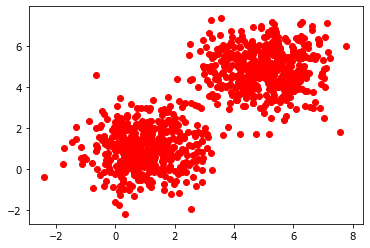

In [21]:
X1 = np.random.multivariate_normal(mean = [1,1], cov = np.identity(2), size = 500)
X2 = np.random.multivariate_normal(mean = [5,5], cov = np.eye(2), size = 500)

plt.scatter(X1[:,0], X1[:,1],  c = 'r')
plt.scatter(X2[:,0], X2[:,1],  c = 'r')

In [19]:
X = np.r_[X1, X2]

In [32]:
centroids, distance = kmeans(X, 2)
centroids

array([[1.00995394, 0.99607041],
       [4.95181426, 4.99320342]])

The mean (non-squared) Euclidean distance between the observations
   passed and the centroids generated. Note the difference to the standard
   definition of distortion in the context of the K-means algorithm, which
   is the sum of the squared distances.

In [35]:
distance

1.2546332037332621

In any case, if we wish to classify the original data by assigning to each point the
cluster to which it belongs; we do so with the vq routine (for vector quantization).
The syntax is pretty simple as well:
**`vq(obs, centroids)`**

In [26]:
from scipy.cluster.vq import vq

In [38]:
scipy.info(vq)

 vq(obs, code_book, check_finite=True)

Assign codes from a code book to observations.

Assigns a code from a code book to each observation. Each
observation vector in the 'M' by 'N' `obs` array is compared with the
centroids in the code book and assigned the code of the closest
centroid.

The features in `obs` should have unit variance, which can be
achieved by passing them through the whiten function.  The code
book can be created with the k-means algorithm or a different
encoding algorithm.

Parameters
----------
obs : ndarray
    Each row of the 'M' x 'N' array is an observation.  The columns are
    the "features" seen during each observation. The features must be
    whitened first using the whiten function or something equivalent.
code_book : ndarray
    The code book is usually generated using the k-means algorithm.
    Each row of the array holds a different code, and the columns are
    the features of the code.

     >>> #              f0    f1    f2   f3
     >>> code_book 

In [39]:
labels, distance_to_centroid = vq(X, centroids)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
distance_to_centroid

array([0.87641389, 0.36736093, 1.71924698, ..., 1.78758319, 1.95671099,
       1.58178813])

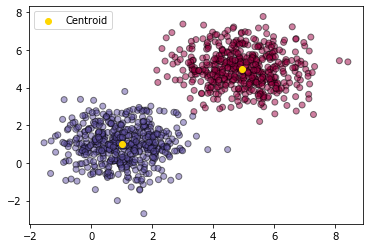

In [59]:
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'Spectral_r', ec = 'k', alpha = .5)
plt.scatter(centroids[:,0], centroids[:,1], c = 'gold', label = 'Centroid')
plt.legend()

### kmeans2

more flexible

```python
kmeans2(
    data,
    k,
    iter=10,
    thresh=1e-05,
    minit='random',
    missing='warn',
    check_finite=True,
)
```

In [47]:
scipy.info(kmeans2)

 kmeans2(data, k, iter=10, thresh=1e-05, minit='random', missing='warn',
         check_finite=True)

Classify a set of observations into k clusters using the k-means algorithm.

The algorithm attempts to minimize the Euclidian distance between
observations and centroids. Several initialization methods are
included.

Parameters
----------
data : ndarray
    A 'M' by 'N' array of 'M' observations in 'N' dimensions or a length
    'M' array of 'M' one-dimensional observations.
k : int or ndarray
    The number of clusters to form as well as the number of
    centroids to generate. If `minit` initialization string is
    'matrix', or if a ndarray is given instead, it is
    interpreted as initial cluster to use instead.
iter : int, optional
    Number of iterations of the k-means algorithm to run. Note
    that this differs in meaning from the iters parameter to
    the kmeans function.
thresh : float, optional
    (not used yet)
minit : str, optional
    Method for initialization. Availa

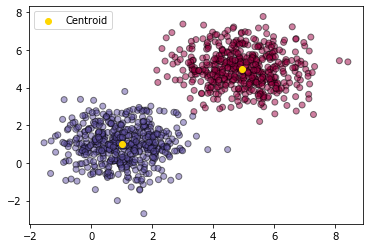

In [60]:
centroids, labels = kmeans2(X, 2, minit = '++')
plt.scatter(X[:,0], X[:,1], c = labels, cmap = 'Spectral_r', ec = 'k', alpha = .5)
plt.scatter(centroids[:,0], centroids[:,1], c = 'gold', label = 'Centroid')
plt.legend()

# Hirarchical Clustering

• Single/min/nearest method: `single`  
• Complete/max/farthest method: `complete`  
• Average/UPGMA method: `average`  
• Weighted/WPGMA method: `weighted`  
• Centroid/UPGMC method: `centroid`  
• Median/WPGMC method: `median`  
• Ward's linkage method: `ward`

In [64]:
from scipy.cluster.hierarchy import linkage

```python
linkage(y, method='single', metric='euclidean', optimal_ordering=False)
```

Returns:  
Z : ndarray The hierarchical clustering encoded as a linkage matrix.

In [66]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

Visualize likage matrix: **Dendrogram**

In [74]:
from scipy.cluster.hierarchy import dendrogram

```python
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='b',
)
```

In [76]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children.  The top of the U-link indicates a
    cluster merge.  The two legs of the U-link indicate which clusters
    were merged.  The length of the two legs of the U-link represents
    the distance between the child clusters.  It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
       

In [77]:

X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
X

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [82]:
linkage_matrix = linkage(X, method = 'ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [12.5, 12.5, 47.5, 47.5]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 1.1547005383792515, 1.1547005383792515, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 2.1213203435596424, 2.1213203435596424, 1.0],
  [0.0, 4.110960958218893, 4.110960958218893, 2.1213203435596424],
  [1.1547005383792515,
   14.071839491220281,
   14.071839491220281,
   4.110960958218893]],
 'ivl': ['1', '5', '6', '3', '2', '7', '0', '4'],
 'leaves': [1, 5, 6, 3, 2, 7, 0, 4],
 'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'b']}

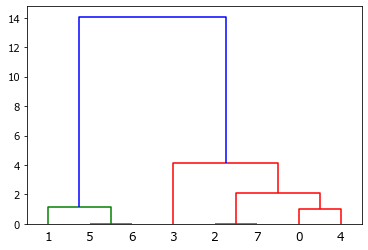

In [85]:
dendrogram(linkage_matrix)